In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from scipy.stats import gaussian_kde
import random
import matplotlib.gridspec as gs

ntime=np.load('Time.24.02.2019.mms1.npy')
nmag_derx=np.load('nfderivativebx.15.mms1.npy')

nl = ntime.size

nder_meanx = (np.sum(nmag_derx))/nl
nabs_magx = abs(nmag_derx)
nstd_devx = np.sqrt(np.sum(((nmag_derx)-(nder_meanx))**2)/nl)
print(nstd_devx)
nratio = nmag_derx/nstd_devx

nratio_meanx = (np.sum(nratio))/nl
nstd_meanx = np.sqrt(np.sum(((nratio)-(nratio_meanx))**2)/nl)

nx = np.linspace(nratio_meanx - 10*nstd_meanx, nratio_meanx + 10*nstd_meanx, 100)
ndensitysx = (1/np.sqrt(2*np.pi*(nstd_meanx)**2))*(np.exp(-((nx-nratio_meanx)**2)/(2*(nstd_meanx)**2)))


0.13028537227255368


In [2]:
time=np.load('Time.24.02.2019.mms1.npy')
mag_derx=np.load('derivativebx.mms1.npy')

l = time.size

der_meanx = (np.sum(mag_derx))/l
abs_magx = abs(mag_derx)
std_devx = np.sqrt(np.sum(((mag_derx)-(der_meanx))**2)/l)

ratio = mag_derx/std_devx

ratio_meanx = (np.sum(ratio))/l
std_meanx = np.sqrt(np.sum(((ratio)-(ratio_meanx))**2)/l)

x = np.linspace(ratio_meanx - 10*std_meanx, ratio_meanx + 10*std_meanx, 100)
densitysx = (1/np.sqrt(2*np.pi*(std_meanx)**2))*(np.exp(-((x-ratio_meanx)**2)/(2*(std_meanx)**2)))


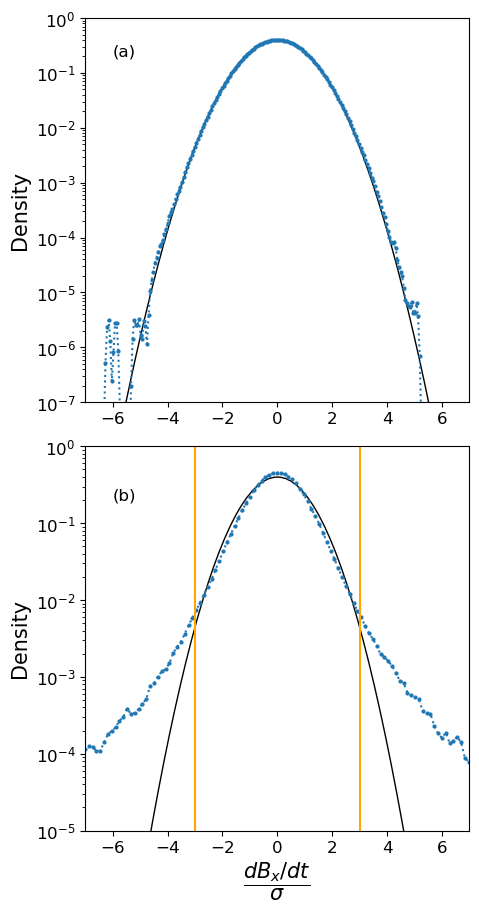

In [3]:
fig1 = plt.figure(figsize=(10, 10))
gs1=gs.GridSpec(nrows=2,ncols=1,height_ratios=[1, 1])

ax1=plt.subplot(gs1[0])
ax1.plot(x,densitysx,lw=1,color='black')
sns.kdeplot(ratio,linestyle=':', marker='o',markersize='2')
#ax1.set_xlabel('$(dB_x/dt)/\sigma$')
ax1.set_ylim(1e-7,1)
ax1.set_xlim(-7,7)
ax1.set_yscale('log')
ax1.text(-6,0.2,'(a)',fontsize=12)
ax1.set_box_aspect(1)

ax2=plt.subplot(gs1[1])
ax2.plot(nx,ndensitysx,lw=1,color='black')
sns.kdeplot(nratio,linestyle=':', marker='o',markersize='2')
ax2.set_xlabel('$\dfrac{dB_x/dt}{\sigma}$',fontsize=15)
ax2.set_ylim(1e-5,1)
ax2.set_xlim(-7,7)
ax2.axvline(x=-3,color='orange')
ax2.axvline(x=3,color='orange')
ax2.set_yscale('log')
ax2.text(-6,0.2,'(b)',fontsize=12)
ax2.set_box_aspect(1)

ax1.set_ylabel('Density',fontsize=15)
ax2.set_ylabel('Density',fontsize=15)
#ax1.set_yticklabels(densitysx,fontsize=7)
#ax1.set_xticklabels(x,fontsize=7)
#ax2.set_yticklabels(ndensitysx,fontsize=7)
#ax2.set_xticklabels(nx,fontsize=7)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("gauss1.pdf", format="pdf", bbox_inches="tight")
#fig1.savefig('gaussfasi1.jpg')
plt.show()
